# Information

This document contains exploratory analysis of the participants of the Autism dataset.

The data is accessible here: **Autism Brain Imaging Data Exchange 1**: http://fcon_1000.projects.nitrc.org/indi/abide/abide_I.html

The orginal dataset contained 1112 participants with and without Autism.
However, in this project I had to reduce the data to 628 participants and their images due to lack of computational power and high processing time.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ABIDE 1 Phenotypic_V1_0b.csv' ,encoding='latin-1')

In [3]:
df.head()

,SITE_ID,SUB_ID,DX_GROUP,DSM_IV_TR,AGE_AT_SCAN,SEX,HANDEDNESS_CATEGORY,HANDEDNESS_SCORES,FIQ,VIQ,...,WISC_IV_BLK_DSN_SCALED,WISC_IV_PIC_CON_SCALED,WISC_IV_MATRIX_SCALED,WISC_IV_DIGIT_SPAN_SCALED,WISC_IV_LET_NUM_SCALED,WISC_IV_CODING_SCALED,WISC_IV_SYM_SCALED,EYE_STATUS_AT_SCAN,AGE_AT_MPRAGE,BMI
0,CALTECH,51456,1,4,55.4,1,R,NaN,126.0,118.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
1,CALTECH,51457,1,4,22.9,1,Ambi,NaN,107.0,119.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
2,CALTECH,51458,1,1,39.2,1,R,NaN,93.0,80.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
3,CALTECH,51459,1,1,22.8,1,R,NaN,106.0,94.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
4,CALTECH,51460,1,1,34.6,2,Ambi,NaN,133.0,135.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN


In [4]:
# Changing the SEX labels

df.loc[:, 'SEX'] = df['SEX'].map({1: 'Male', 2: 'Female'})

In [5]:
trim_df = df[['SITE_ID', 'SUB_ID', 'DX_GROUP', 'AGE_AT_SCAN', 'SEX']]

In [6]:
trim_df

,SITE_ID,SUB_ID,DX_GROUP,AGE_AT_SCAN,SEX
0,CALTECH,51456,1,55.40,Male
1,CALTECH,51457,1,22.90,Male
2,CALTECH,51458,1,39.20,Male
3,CALTECH,51459,1,22.80,Male
4,CALTECH,51460,1,34.60,Female
...,...,...,...,...,...
1107,YALE,50624,1,11.08,Female
1108,YALE,50625,1,7.00,Male
1109,YALE,50626,1,11.08,Male
1110,YALE,50627,1,9.50,Female


In [7]:
trim_df['AGE_AT_SCAN'].min()

6.47

In [8]:
trim_df['AGE_AT_SCAN'].max()

64.0

In [9]:
# Combining the UCLA1 and UCLA2

trim_df.loc[trim_df['SITE_ID'].isin(['UCLA_1', 'UCLA_2']), 'SITE_ID'] = 'UCLA'

In [10]:
unique_labels = trim_df['SITE_ID'].unique()


print(unique_labels)

['CALTECH' 'CMU' 'KKI' 'LEUVEN_1' 'LEUVEN_2' 'MAX_MUN' 'NYU' 'OHSU' 'OLIN'
 'PITT' 'SBL' 'SDSU' 'STANFORD' 'TRINITY' 'UCLA' 'UM_1' 'UM_2' 'USM'
 'YALE']


In [11]:
select_Uni = ['KKI', 'NYU', 'OHSU', 'OLIN', 'PITT', 'SBL', 'SDSU', 'STANFORD', 'TRINITY', 'YALE', 'UCLA']

In [12]:
trim_uniDF = trim_df[trim_df['SITE_ID'].isin(select_Uni)].copy()

In [13]:
uni_name_mapping = {
    'KKI': 'Kennedy Krieger Institute',
    'NYU': 'New York Uni',
    'OHSU': 'Oregon Health & Science Uni',
    'OLIN': 'OLIN Medical Center',
    'PITT': 'Uni of Pittsburgh',
    'SBL': 'Social Brain Lab (NL)',
    'SDSU': 'San Diego State Uni',
    'STANFORD': 'Stanford Uni',
    'TRINITY': 'Trinity College Dublin',
    'YALE': 'Yale Uni',
    'UCLA': 'Uni of California Los Angeles'}

In [14]:
renamed_data = trim_uniDF.copy()
renamed_data['Renamed University'] = renamed_data['SITE_ID'].map(uni_name_mapping)


In [15]:
participants_by_university = renamed_data['Renamed University'].value_counts().sort_index()

In [16]:
renamed_data.tail()

,SITE_ID,SUB_ID,DX_GROUP,AGE_AT_SCAN,SEX,Renamed University
1107,YALE,50624,1,11.08,Female,Yale Uni
1108,YALE,50625,1,7.00,Male,Yale Uni
1109,YALE,50626,1,11.08,Male,Yale Uni
1110,YALE,50627,1,9.50,Female,Yale Uni
1111,YALE,50628,1,14.42,Male,Yale Uni


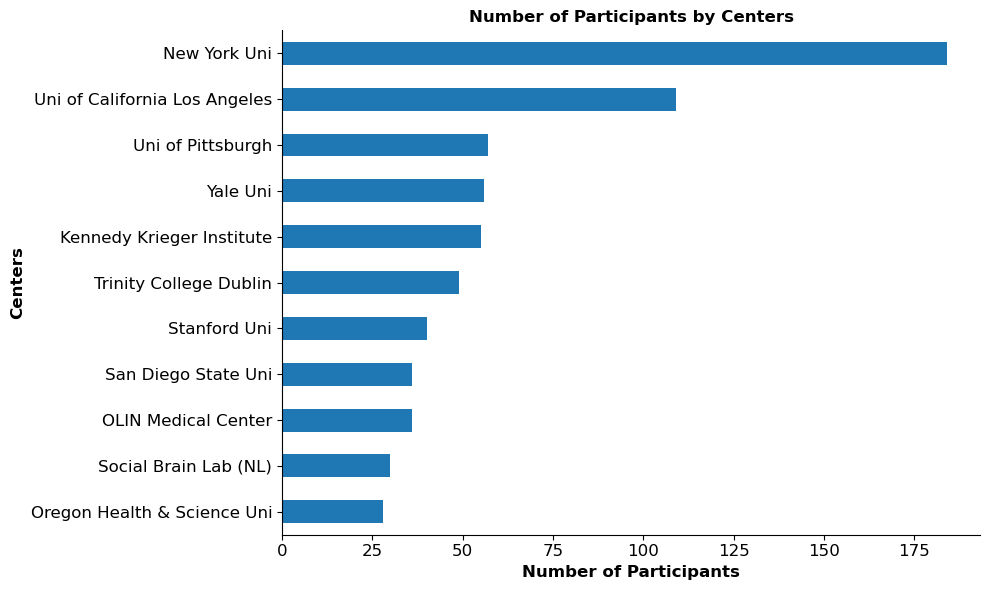

In [17]:
plt.figure(figsize=(10, 6))

participants_by_university.sort_values().plot(kind='barh')
plt.title('Number of Participants by Centers', fontweight='bold', fontsize=12)
plt.xlabel('Number of Participants', fontweight='bold', fontsize=12)
plt.ylabel('Centers', fontweight='bold', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
#plt.savefig('ABIDE1_participants.png', dpi=300)

plt.show()


In [18]:
renamed_data.head()

,SITE_ID,SUB_ID,DX_GROUP,AGE_AT_SCAN,SEX,Renamed University
65,KKI,50772,2,12.77,Male,Kennedy Krieger Institute
66,KKI,50773,2,10.84,Male,Kennedy Krieger Institute
67,KKI,50774,2,10.64,Male,Kennedy Krieger Institute
68,KKI,50775,2,11.00,Male,Kennedy Krieger Institute
69,KKI,50776,2,9.30,Male,Kennedy Krieger Institute


<Figure size 1000x600 with 0 Axes>

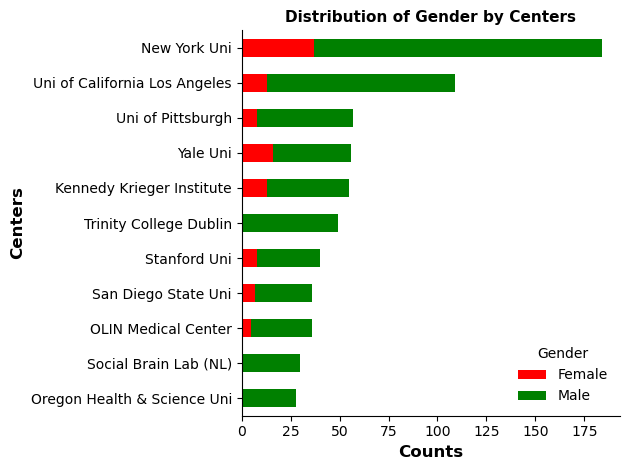

In [19]:
participants_sex_by_university = renamed_data.groupby(['Renamed University', 'SEX']).size().unstack()

# total participants for each center and sort them
university_participant_counts = participants_sex_by_university.sum(axis=1)
sorted_universities = university_participant_counts.sort_values().index

# bar plot for the distribution of gender
colors = {'Male': 'green', 'Female': 'red'}

plt.figure(figsize=(10,6))
participants_sex_by_university.loc[sorted_universities].plot(kind='barh', stacked=True, color = colors)
plt.title('Distribution of Gender by Centers', fontweight='bold', fontsize=11)
plt.xlabel('Counts', fontweight='bold', fontsize=12)
plt.ylabel('Centers', fontweight='bold', fontsize=12)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
legend = plt.legend(title='Gender', fontsize = 10)
legend.get_frame().set_linewidth(0)


plt.tight_layout()
plt.savefig('ABIDE1_Gender.png',dpi=300)
# Display the plot
plt.show()

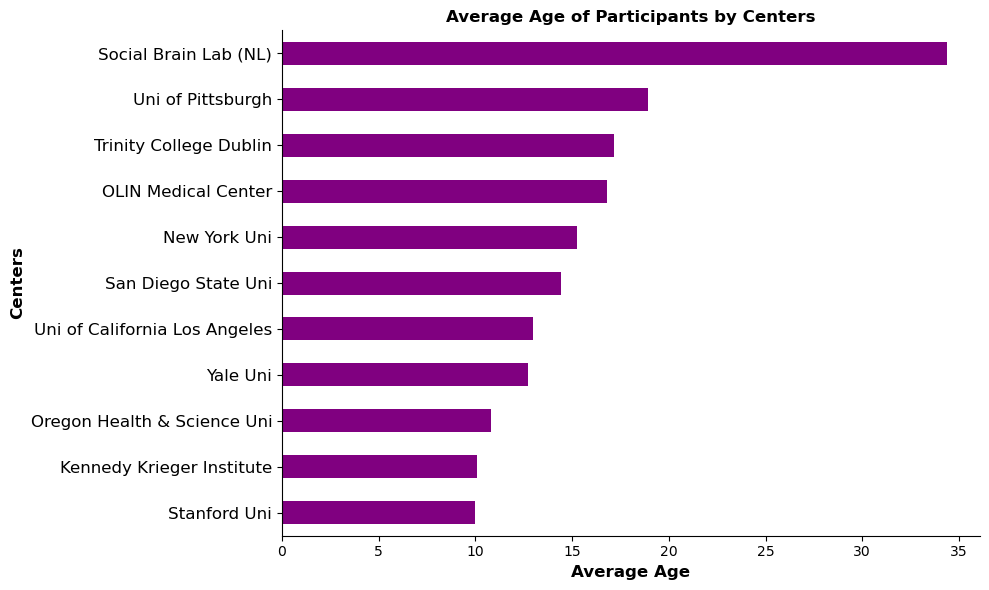

In [20]:
# Group data by center and calculate mean age
participants_age_by_university = renamed_data.groupby('Renamed University')['AGE_AT_SCAN'].mean()

# Sort center by mean age
sorted_universities = participants_age_by_university.sort_values(ascending=True).index

# bar plot for the distribution of participants' age
plt.figure(figsize=(10, 6))
participants_age_by_university.loc[sorted_universities].plot(kind='barh', color = 'purple')
plt.title('Average Age of Participants by Centers', fontweight='bold', fontsize=12)
plt.xlabel('Average Age', fontweight='bold', fontsize=12)
plt.ylabel('Centers', fontweight='bold', fontsize=12)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.yticks(fontsize=12)

plt.tight_layout()
#plt.savefig('ABIDE1_age.png', dpi = 300)
plt.show()